# ASTR 400B
## MW and M31 Halor Merger Remnant: Dark Matter Halo Density Evolution       

Question 1: 
- 1.1: What is the final density profile ?
- 1.2: Is it well fit by a Hernquist profile ?        
- 1.3: Is it more or less concetrated than the MW or M31 before they merged ?


In [144]:
# import relevant modules
import numpy as np
import astropy.units as u
#import math 


# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from MassProfileMerger import MassProfileMerger

# 1.1 What is the final density profile ?
## Evolution of Dark Matter Halo Density 
- Before Collision -- Snapshot 0 

- During Collision -- Snapshot 455 { 6.5 Gyr } via Homework #6

- After Collison -- Snapshot 801 ( 11.4 Gyr }


In [145]:
# Create a mass profile object for the Merger using solution to Homework 5
# MassProfile for MW and M31 Merger at 3 different stages 
# Using HighRes files

# Before Collision (Both MW and M31 would be yield the same result so just pick MW)
MP_0 = MassProfile("MW",0) # from Homework #5
# During Collisions
MP_1a = MassProfile("MW",350)
MP_1 = MassProfileMerger("MW","M31",455)
# After Collision 
MP_2 = MassProfileMerger("MW","M31",801)

In [146]:
# Define an array of radii from 1 kpc to 300 kpc in increments of 0.5
R = np.arange(1,300,0.5)

In [147]:
# Mass Profile of Halo
# creating an intance of MassProfile and MassProfileMerger classes

# Before Collision
Mhalo_0 = MP_0.MassEnclosed(1,R)
# During Collisions
Mhalo_1a = MP_1a.MassEnclosed(1,R)
Mhalo_1 = MP_1.MassEnclosed(1,R)
# After Collision
Mhalo_2 = MP_2.MassEnclosed(1,R)

Hernquist Density Profile:

$\rho(r) = \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3}$

In [148]:
# From Lab 3:
# Function that returns the Hernquist profile
#def Hernquist(r,a,Mhalo):
# Input:  Radius (kpc), Hernquist Scale Length (kpc), Total Mass (1e12 Msun)
# Defaults for scale length is 60 kpc, Default for Halo Mass is for MW from Assignment 3 
# Returns: Density in units of Msun/kpc^3
    #return ((Mhalo*a)/(2*np.pi*r*(r+a)**3))

In [149]:
# Set Critical Density (rho_crit) as a Global Variable
# rho_crit = (3.3e11 * 0.6781^2) / 10^9
rho_crit = 151.74 # units of (Msun/kpc^3)

Converting to Density Profile:

$\rho(R) = \frac{M_{halo}}{V(R)}$


In [150]:
# Function that computes the Local Halo Density Profile
def rho_local(Mhalo):
    """
    Inputs: Mhalo is the Mass Profile of Halo
    Returns: Local Halo Density Profile associated with Mhalo
    """
    return (Mhalo[1:]-Mhalo[:-1])/((4/3)*np.pi*(R[1:]**3-R[:-1]**3))

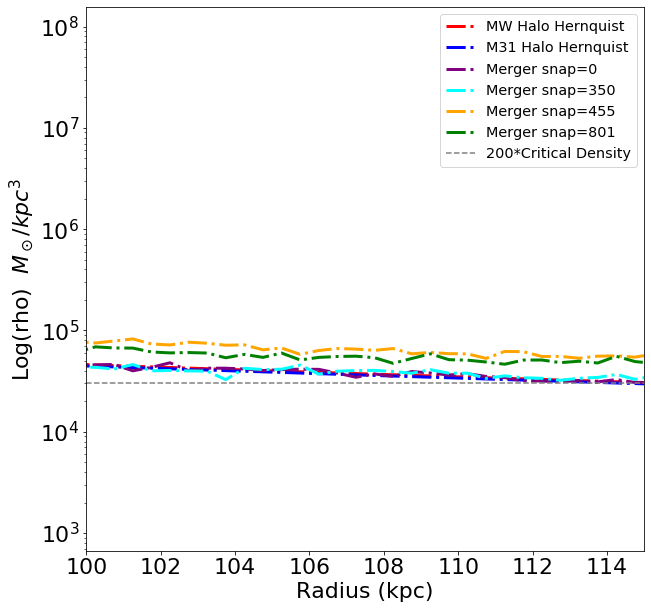

In [151]:
# From Lab 6:
# Plot the Halo Density Profile vs 
# the Hernquist profile
####################################

# Define an array of radii from 0.1 kpc to 300 kpc in increments of 0.1
# R = np.arange(0.1,300,0.1)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the halo luminosity density as a proxy for surface brighntess
#plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Halo Density')

# Hernquist Profile for MW
a_MW = 61 #(obtained from HW#5)
MW_Mhalo = 1.975e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_MW,MW_Mhalo), color='red', linestyle="-.",linewidth=3, label='MW Halo Hernquist')

# Hernquist Profile for M31
a_M31 = 62 #(obtained from HW#5)
M31_Mhalo = 1.921e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_M31,M31_Mhalo), color='blue', linestyle="-.",linewidth=3, label='M31 Halo Hernquist')

# Radius 
r = (R[1:]+R[:-1])/2.0

# Local Density Profile for Halo Merger Remnant
# Before Collision
plt.semilogy(r,rho_local(Mhalo_0), color='purple', linestyle="-.",linewidth=3, label='Merger snap=0')
# During Collisions
plt.semilogy(r,rho_local(Mhalo_1a), color='cyan', linestyle="-.",linewidth=3, label='Merger snap=350')
plt.semilogy(r,rho_local(Mhalo_1), color='orange', linestyle="-.",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(r,rho_local(Mhalo_2), color='green', linestyle="-.",linewidth=3, label='Merger snap=801')

# 200*Critical Denisty
plt.axhline(y=rho_crit*200, color = 'grey', linestyle="--", label = '200*Critical Density')

# axis limit
plt.xlim(100,115)



#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
#plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
plt.ylabel('Log(rho)  $M_\odot/kpc^3$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')



$\rho(r) = \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3}$


$\R = \frac{3{M_{Halo}}{\frac{4}}{3}{\pi}{200\rho_{crit}}$

In [152]:
def R_200(Mhalo):
    
    return (Mhalo[1:]-Mhalo[:-1])/((4/3)*np.pi*200*rho_crit)

print(R_200(Mhalo_0))

[ 5592.86612074  7146.44004317  8513.58509491 10377.87380182
 10812.8745001  13112.1639053  13671.45051737 17337.8849743
 16032.88287946 18953.60185363 21750.034914   21315.03421572
 23800.75249161 22122.89265538 22122.89265538 25727.18415542
 26348.61372439 28772.18904338 28275.0453882  27467.18694854
 28461.47425889 26783.61442267 32997.91011238 30325.76296581
 30885.04957788 31817.19393134 31071.47844857 32625.052371
 32252.19462962 35918.62908655 36788.63048311 32811.48124169
 33930.05446584 34489.34107792 37285.77413829 34924.3417762
 37285.77413829 36602.20161242 34116.48333653 35794.34317276
 36664.34456932 37596.48892277 37347.91709518 35545.77134517
 36788.63048311 35794.34317276 40206.49311245 38466.49031933
 34365.05516412 36415.77274173 35794.34317276 34489.34107792
 37782.91779346 37410.06005208 36975.0593538  38404.34736244
 37969.34666416 36229.34387104 35670.05725896 35670.05725896
 38777.20510382 37472.20300898 36850.77344001 38652.91919002
 37161.48822449 39274.348759

# 1.2: Is it well fit by a Hernquist profile ?


$\rho(r) =  \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3} \qquad M(r) =  \frac{M_{halo} r^2}{(a+r)^2}$ 

In [153]:
# Scale Length for MW+M31 Merger
# From Homework #5
# TESTING
###############

# test Radius
RR = 30

# array of radii, not starting at 0.
# intervales of 1 kpc
testR = np.arange(1,RR+1,1.0)

Text(0.15, 0.83, 'Before Merger Mass Profile')

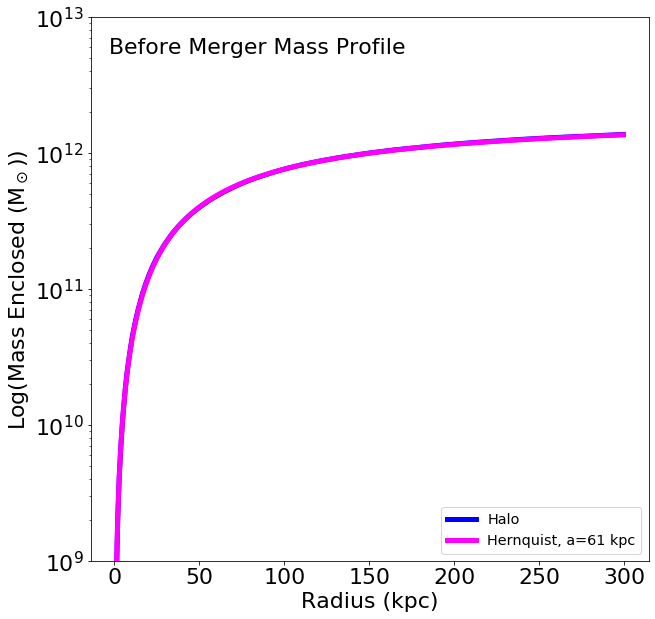

In [154]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_0 = 61

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
#MtotM31 = 1.921e12 
#MtotMerger = MtotMW + MtotM31
# Plot the Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_0.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# TOTAL Mass
#plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Mass Profile
plt.semilogy(R,MP_0.HernquistMass(R,a_0,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=61 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Before Merger Mass Profile', fontsize=22)


# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'During Merger Mass Profile')

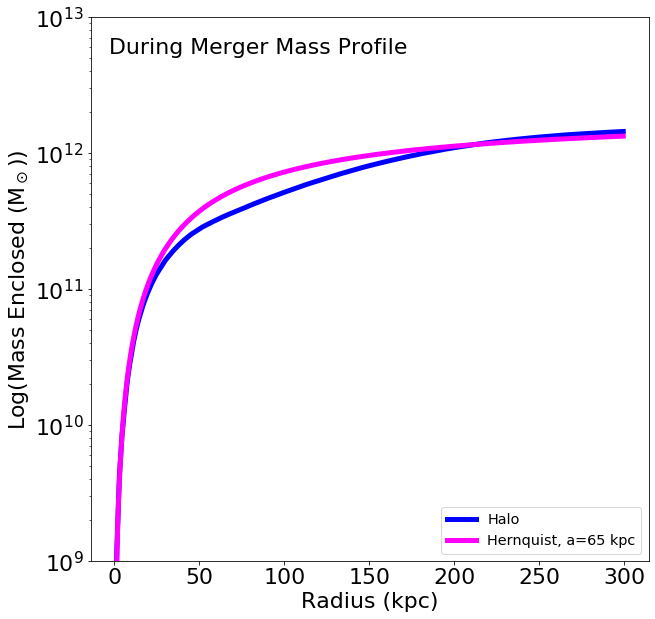

In [155]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_1a = 65

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
#MtotM31 = 1.921e12 
#MtotMerger = MtotMW + MtotM31
# Plot the Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_1a.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# TOTAL Mass
#plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Mass Profile
plt.semilogy(R,MP_1a.HernquistMass(R,a_1a,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=65 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'During Merger Mass Profile', fontsize=22)


# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'During Merger Mass Profile')

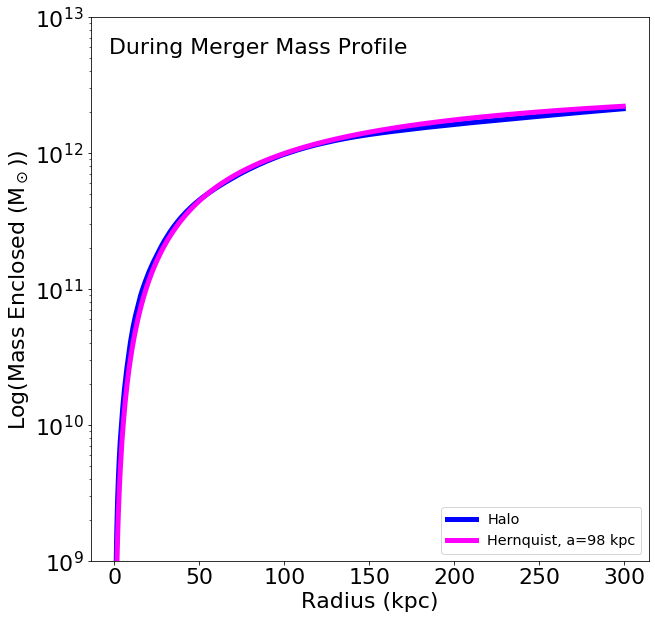

In [156]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_1 = 98

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
MtotM31 = 1.921e12 
MtotMerger = MtotMW + MtotM31
# Plot the Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_1.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# TOTAL Mass
#plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Mass Profile
plt.semilogy(R,MP_1.HernquistMass(R,a_1,MtotMerger), color='magenta',linewidth=5, label='Hernquist, a=98 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'During Merger Mass Profile', fontsize=22)


# Save to a file
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

Text(0.15, 0.83, 'After Merger Mass Profile')

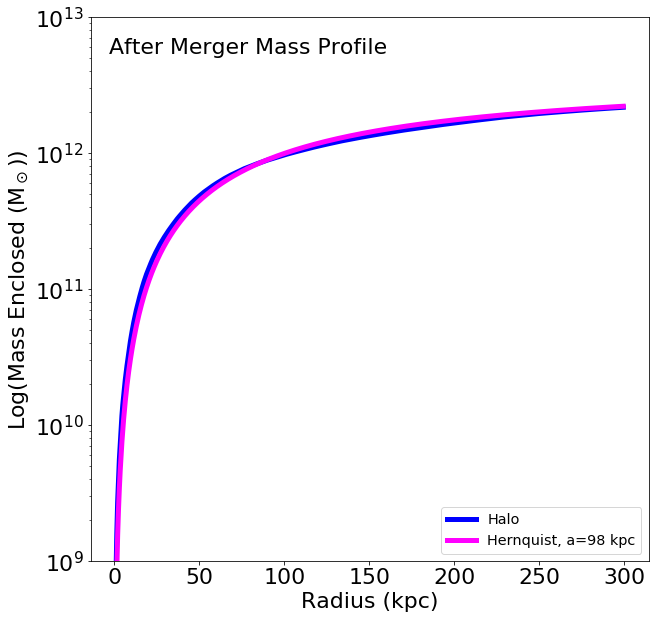

In [157]:
# Testing Code and Hernquist Halo Match
# Merger at 30 kpc
######################################

# scale radius to test
a_2 = 98

# total Halo Mass from Merger (MW Halo Mass + M31 Halo Mass = Merger Halo Mass)
MtotMW = 1.975e12 
MtotM31 = 1.921e12 
MtotMerger = MtotMW + MtotM31
# Plot the Mass Profile for the MW.
####################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MP_2.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# TOTAL Mass
#plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Mass Profile
plt.semilogy(R,MP_2.HernquistMass(R,a_2,MtotMerger), color='magenta',linewidth=5, label='Hernquist, a=98 kpc')

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e13)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'After Merger Mass Profile', fontsize=22)


# Save to a files
#ax.set_rasterized(True)
#plt.savefig('MassProfile_MW.pdf')

In [158]:
# Function that returns the Hernquist profile
def rho_Hernquist(a,Mhalo):
# Input:  Radius (kpc), Hernquist Scale Length (kpc), Total Mass (1e12 Msun)
# Defaults for scale length is 60 kpc, Default for Halo Mass is for MW from Assignment 3 
# Returns: Density in units of Msun/kpc^3
    return ((Mhalo[1:]-Mhalo[:-1])*a)/(2*np.pi*(R[1:]-R[:-1])*((R[1:]-R[:-1])+a)**3)

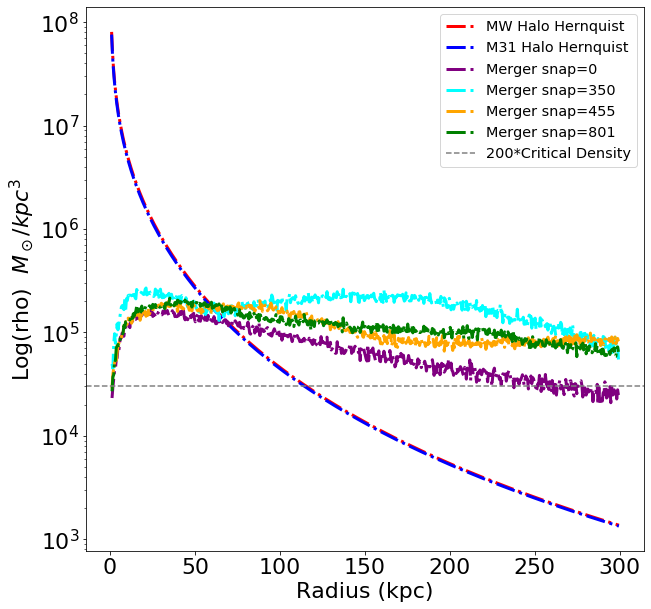

In [143]:
#From Lab 6:
# Plot the Halo Density Profile vs 
# the Hernquist profile
####################################

# Define an arrya of radii from 0.1 kpc to 300 kpc in increments of 0.1
# R = np.arange(0.1,300,0.1)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the halo luminosity density as a proxy for surface brighntess
#plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Halo Density')

# Hernquist Profile for MW
a_MW = 61 #(obtained from HW#5)
MW_Mhalo = 1.975e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_MW,MW_Mhalo), color='red', linestyle="-.",linewidth=3, label='MW Halo Hernquist')

# Hernquist Profile for M31
a_M31 = 62 #(obtained from HW#5)
M31_Mhalo = 1.921e12*u.Msun #(obtained from HW#3)
plt.semilogy(R,Hernquist(R,a_M31,M31_Mhalo), color='blue', linestyle="-.",linewidth=3, label='M31 Halo Hernquist')


#BC = plt.semilogy((R[1:]+R[:-1])/2.0,(Mhalo_0[1:]-Mhalo_0[:-1])/((4/3)*np.pi*(R[1:]**3-R[:-1]**3)), color='purple', linestyle="-.",linewidth=3, label='Merger snap=0')

# Radius
r = (R[1:]+R[:-1])/2.0

# Hernquist Local Density Profile for Halo Merger
# Before Collision
plt.semilogy(r,rho_Hernquist(a_1,Mhalo_0), color='purple', linestyle="-.",linewidth=3, label='Merger snap=0')
# During Collisions
plt.semilogy(r,rho_Hernquist(a_1a,Mhalo_1a), color='cyan', linestyle="-.",linewidth=3, label='Merger snap=350')
plt.semilogy(r,rho_Hernquist(a_1,Mhalo_1), color='orange', linestyle="-.",linewidth=3, label='Merger snap=455')
# After Collision
plt.semilogy(r,rho_Hernquist(a_2,Mhalo_2), color='green', linestyle="-.",linewidth=3, label='Merger snap=801')

# 200*Critical Denisty
plt.axhline(y=rho_crit*200, color = 'grey', linestyle="--", label = '200*Critical Density')


# axis limits
#plt.xlim(0,1000)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
#plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)
plt.ylabel('Log(rho)  $M_\odot/kpc^3$', fontsize=22)




# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')



1.3: Is it more or less concetrated than the MW or M31 before they merged ?

Concentration Pararmeter,

$c =  \frac{R_{200}}{R_{scale}}$


In [ ]:
# Function that returns R_200 (Edge of the Galaxy); radius where the density = 200 times the critical density of the universe
#def R_200(M):
    """
    Inputs: Mass of the galaxy
    Returns: R_200, radius at the edge of the galaxy
    """
    
    #return ((3*M)/(800*math.pi*rho_crit))**0.33

In [ ]:
# Plot the Mass Profile for the Merger.
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot mass enclosed for Halo 
plt.semilogy(R,MW.MassEnclosed(1,R), color='blue', linewidth=5, label='Halo')

# for Disk
plt.semilogy(R,MW.MassEnclosed(2,R), color='red', linestyle=":", linewidth=3, label='Disk')

# for bulge
plt.semilogy(R,MW.MassEnclosed(3,R), color='green', linestyle="-.",linewidth=3, label='Bulge')

# TOTAL Mass
plt.semilogy(R,MW.MassEnclosedTotal(R), color='black', linestyle="--",linewidth=5, label='Total')

# Hernquist Profile
plt.semilogy(R,MW.HernquistMass(R,ScaleMW,MtotMW), color='magenta',linewidth=5, label='Hernquist, a=61 kpc')


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel(r'Log(Mass Enclosed (M$_\odot$))', fontsize=22)

#set axis limits
plt.ylim(1e9,1e12)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
# do it this way!!: 
#plt.rcParams.update[{'font.size':20}]


# add a legend with some customizations.
legend = ax.legend(loc='lower right',fontsize='x-large')

#add figure text
plt.figtext(0.15, 0.83, 'Milky Way Mass Profile', fontsize=22)


# Save to a file
ax.set_rasterized(True)
plt.savefig('MassProfile_MW.eps', rasterized=True, dpi=350)

In [ ]:
# Function that returns the Concetration Parameter of the galaxy
def Concentration(galaxy):
    """
    Inputs: galaxy, the galaxy filename
    Returns: Concentration Parameter of the galaxy system
    """
    # Concentration Parameter, c = R_200 / a 
    # where R_200 is the Edge of the Galaxy
    #       a is the Scale Length
    
    
    return c
    

In [ ]:
# Compare to see Concentration Parameters of Merger, MW, and M31